<a href="https://colab.research.google.com/github/Mohsal2026/github.com/blob/main/4_ensembles__live__lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 🎥 Recommended Video  : [Ensemble Learning](https://www.youtube.com/watch?v=sN5ZcJLDMaE)



# Ensemble Methods

Ensemble methods combine multiple individual models (called "weak learners") to create a single stronger model. They are widely used in machine learning to improve prediction accuracy and reduce overfitting(*when a model learns the training data too well, capturing noise and details that do not generalize to new, unseen data.*). Here, we’ll cover the most common ensemble techniques: Voting, Stacking, Bagging, Cascading, and Boosting.

---

## 1. Voting
- Combines predictions from multiple models using either:
  - **Hard Voting**: Takes the majority vote (classification).
  - **Soft Voting**: Averages the predicted probabilities and selects the class with the highest probability.
- Example:
  - Combine Logistic Regression, Decision Trees, and SVM to make a final prediction.

---

## 2. Stacking
- Trains multiple base models (e.g., Logistic Regression, SVM, Random Forest) and uses their predictions as inputs to a **meta-model** (e.g., Linear Regression).
- The meta-model learns how to combine the predictions from the base models to make the final prediction.

---

## 3. Bagging (Bootstrap Aggregating)
- Creates multiple models by training each on a random subset (with replacement) of the dataset.
- Reduces variance and prevents overfitting.
- **Example**: Random Forest
  - Random Forest is a bagging method that builds multiple decision trees and combines their results.



### Example Code: Bagging (Random Forest) Using the iris Dataset

# Iris Dataset Summary

The Iris dataset contains 150 samples of iris flowers, with 50 samples from each of three species:

- **Iris setosa**
- **Iris versicolor**
- **Iris virginica**

Each sample is described by four features:

1. **Sepal Length** (in cm)
2. **Sepal Width** (in cm)
3. **Petal Length** (in cm)
4. **Petal Width** (in cm)

## Dataset Structure

The dataset is typically represented as a dictionary with the following key:

- `'data'`: A 2D NumPy array where each row corresponds to a sample and each column corresponds to one of the four features.

Example of the data array:
```python
array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       ...
       [5.8, 4. , 1.2, 0.2]])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target



In [2]:
# view the dataset
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create and train the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Visualize the feature importance
# Random Forest provides an estimate of the importance of each feature in making predictions.
importances = model.feature_importances_
feature_names = iris.feature_names

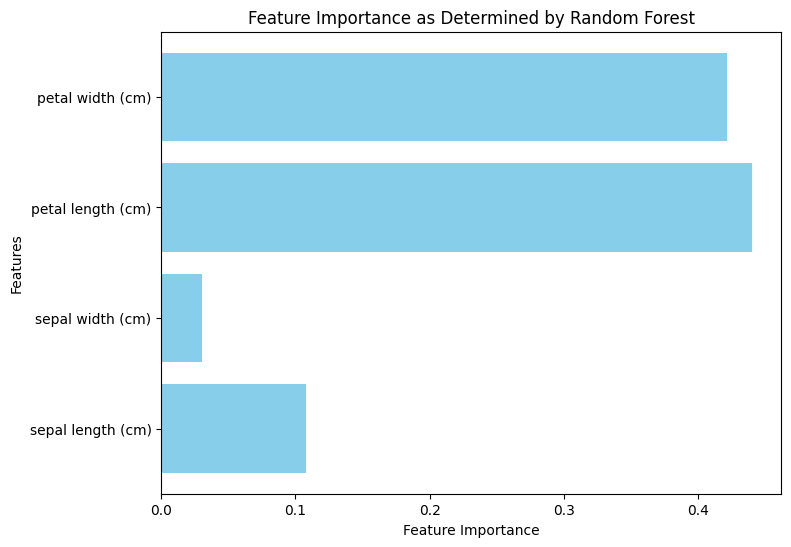

In [6]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance as Determined by Random Forest')
plt.show()

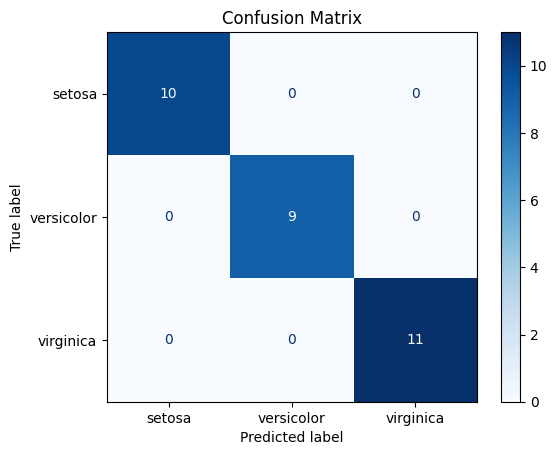

In [7]:
# Visualize the confusion matrix
# The confusion matrix shows the number of correct and incorrect predictions for each class.
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [8]:
# Visualize the decision boundary (only for first two features)
# For simplicity, we use the first two features to visualize the decision boundaries.
X_train_2D = X_train[:, :2]  # Select only the first two features for plotting.
X_test_2D = X_test[:, :2]
model_2D = RandomForestClassifier(n_estimators=100, random_state=42)
model_2D.fit(X_train_2D, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Create a grid of points to predict and visualize the decision regions
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

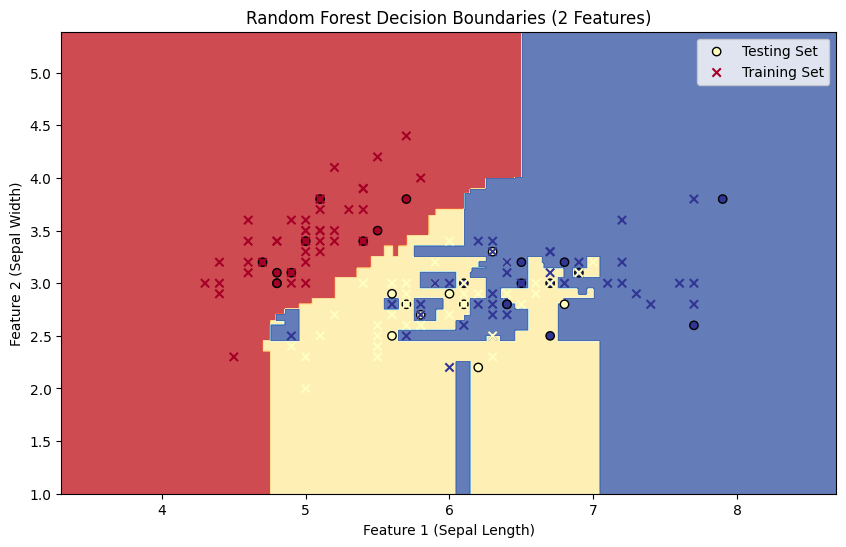

In [10]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.RdYlBu, marker='o', label='Testing Set')
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap=plt.cm.RdYlBu, marker='x', label='Training Set')
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.title('Random Forest Decision Boundaries (2 Features)')
plt.legend()
plt.show()

### Key Takeaways

1. **Ensemble Power:** Random Forest leverages the power of multiple decision trees, creating a more robust and accurate model.
2. **Predictive Accuracy:** The model's accuracy metric quantifies its ability to correctly predict the target classes.
3. **Feature Importance:** Feature importance analysis helps identify the most influential features in the decision-making process.
4. **Visualizing Decision Boundaries:** Decision boundary plots provide a visual representation of how the model classifies data points.

## 4. Cascading

A two-stage approach:

* Train a primary model and use its predictions as additional features.
* Train a secondary model on these extended features.

it is often used to sequentially combine classifiers in a pipeline.

## 5. Boosting

* **Sequential Learning:** Builds models sequentially, where each model learns from the mistakes of the previous one.
* **Focus on Hard-to-Predict Samples:** Assigns higher weights to "hard-to-predict" samples, ensuring they receive more attention in subsequent models.
* **Popular Algorithm:** XGBoost (Extreme Gradient Boosting) is a widely-used boosting algorithm renowned for its speed and performance.

## Example: Boosting using the breast Cancer Dataset

# Breast Cancer Dataset Summary

The Breast Cancer dataset contains features computed from digitized images of fine needle aspirates (FNA) of breast masses. The goal is to classify whether the mass is malignant (cancerous) or benign (non-cancerous).

## Dataset Overview

- **Samples**: 569
- **Features**: 30 (computed from digitized images)
- **Classes**: 2 (Malignant, Benign)

## Features

The dataset includes the following features for each sample:

1. **Mean Radius**
2. **Mean Texture**
3. **Mean Perimeter**
4. **Mean Area**
5. **Mean Smoothness**
6. **Mean Compactness**
7. **Mean Concavity**
8. **Mean Concave Points**
9. **Mean Symmetry**
10. **Mean Fractal Dimension**
11. **Radius Error**
12. **Texture Error**
13. **Perimeter Error**
14. **Area Error**
15. **Smoothness Error**
16. **Compactness Error**
17. **Concavity Error**
18. **Concave Points Error**
19. **Symmetry Error**
20. **Fractal Dimension Error**
21. **Worst Radius**
22. **Worst Texture**
23. **Worst Perimeter**
24. **Worst Area**
25. **Worst Smoothness**
26. **Worst Compactness**
27. **Worst Concavity**
28. **Worst Concave Points**
29. **Worst Symmetry**
30. **Worst Fractal Dimension**

In [11]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

## Displaying the cancer dataset

In [12]:
# display cancer dataset
import pandas as pd

# Convert to a Pandas DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df['target'] = df['target'].map({0: 'malignant', 1: 'benign'})

# Display the dataset neatly
df.head(10).style.set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,malignant
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,malignant
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,malignant
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,malignant
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,malignant
5,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400,malignant
6,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680,malignant
7,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100,malignant
8,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200,malignant
9,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500,malignant


In [13]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train) # training the model

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:58:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.96
